In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras import layers, models

In [32]:
def prepareData():
    allData = pd.read_csv("data/songs_with_genre.csv", index_col=0,header=[0, 1, 2])
    genres = allData["genre_id"]
    genres_index = pd.read_csv("data/genres_no_zeroes.csv", index_col=0)
    genres.columns = range(genres.shape[1])
    allData.drop(columns=["genre_id"], inplace=True)
    data_x = allData
    data_x.columns = range(data_x.shape[1])
    curr = genres_index['genre_index']
    late = genres[0].unique().tolist()
    update_genres = {late[i]:curr[i] for i in range(len(curr))}
    #normalizing
    mu = np.mean(data_x, axis=0)
    sigma = (np.std(data_x, axis=0))
    data_x = (data_x - mu) / sigma
    #Creating the right lables
    genres.columns = range(genres.shape[1])
    genres[0]=genres[0].map(update_genres)
    targets = OneHotEncoder().fit_transform(genres_index).toarray()
    #generes[0] = generes[0] - 1
    data_y = [targets[i - 1] for i in genres[0]]
    genres[0] = data_y
    # print(genres)
    test = genres.copy()
    test.rename(columns={0: "oneHotVector"}, inplace=True)
    # test.shape
    split = pd.DataFrame(test["oneHotVector"].to_list(), columns=range(16))
    split.index = genres.index
    genres = split
    return data_x, genres

In [43]:
data, labels = prepareData()
#data = data.reshape(-1, 1, 518)

x_train, x_rest, y_train, y_rest = train_test_split(data, labels, train_size=0.8)
x_test, x_valid, y_test, y_valid = train_test_split(x_rest, y_rest, train_size=0.5)

In [44]:
CNN = models.Sequential()
#CNN.add(layers.InputLayer(input_shape=(x_train.shape[1],)))
CNN.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu',input_shape=(518,1),padding='SAME'))
CNN.add(layers.MaxPooling1D(3))
CNN.add(layers.Dropout(0.25))
CNN.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
CNN.add(layers.MaxPooling1D(3))
CNN.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
CNN.add(layers.MaxPooling1D(3))
CNN.add(layers.Dropout(0.25))
CNN.add(layers.Flatten())
CNN.add(layers.Dense(64, activation='relu'))
CNN.add(layers.Dense(64, activation='relu'))
CNN.add(layers.Dense(32, activation='relu'))
CNN.add(layers.Dense(16,activation='softmax'))

In [42]:
CNN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 518, 32)           128       
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 172, 32)          0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 172, 32)           0         
                                                                 
 conv1d_20 (Conv1D)          (None, 170, 64)           6208      
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 56, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 55, 128)          

In [45]:
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=10,verbose=1),tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min',patience=10,verbose=1)]
CNN.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [46]:
training = CNN.fit(x_train,y_train,epochs=100, validation_data=(x_valid,y_valid),batch_size=389,callbacks=callback)

Epoch 1/100
102/102 [==============================] - 16s 146ms/step - loss: 1.8507 - accuracy: 0.4031 - val_loss: 1.5456 - val_accuracy: 0.5133
Epoch 2/100
102/102 [==============================] - 16s 154ms/step - loss: 1.4851 - accuracy: 0.5223 - val_loss: 1.3979 - val_accuracy: 0.5641
Epoch 3/100
102/102 [==============================] - 16s 153ms/step - loss: 1.3911 - accuracy: 0.5561 - val_loss: 1.3282 - val_accuracy: 0.5883
Epoch 4/100
102/102 [==============================] - 16s 155ms/step - loss: 1.3374 - accuracy: 0.5743 - val_loss: 1.2768 - val_accuracy: 0.5982
Epoch 5/100
102/102 [==============================] - 16s 154ms/step - loss: 1.2970 - accuracy: 0.5835 - val_loss: 1.2552 - val_accuracy: 0.6091
Epoch 6/100
102/102 [==============================] - 16s 157ms/step - loss: 1.2653 - accuracy: 0.5941 - val_loss: 1.2225 - val_accuracy: 0.6161
Epoch 7/100
102/102 [==============================] - 16s 161ms/step - loss: 1.2397 - accuracy: 0.6042 - val_loss: 1.2131 -

In [47]:
x_train.shape

(39678, 518)

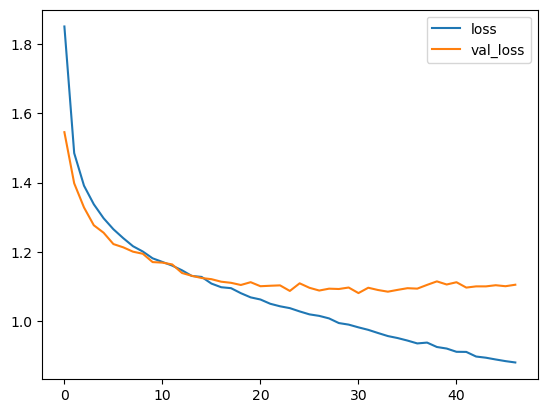

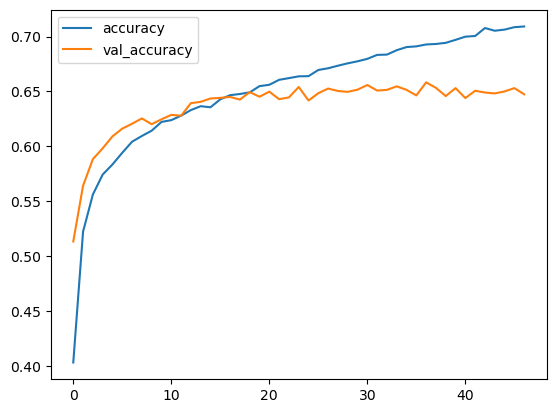

In [48]:
metrics_df = pd.DataFrame(training.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy","val_accuracy"]].plot();# The semicolon prevents certain matplotlib items from being printed.

In [49]:
print(training.history)

{'loss': [1.8507229089736938, 1.4850578308105469, 1.3910584449768066, 1.3373943567276, 1.2970319986343384, 1.2652685642242432, 1.239668846130371, 1.2162522077560425, 1.2009443044662476, 1.1813325881958008, 1.1708728075027466, 1.1602543592453003, 1.1467535495758057, 1.1303819417953491, 1.1275938749313354, 1.1083916425704956, 1.0978643894195557, 1.0951467752456665, 1.0806843042373657, 1.0685855150222778, 1.062451720237732, 1.0501331090927124, 1.0428102016448975, 1.037487506866455, 1.0280237197875977, 1.0195139646530151, 1.0151290893554688, 1.007829189300537, 0.9943927526473999, 0.9899246692657471, 0.9819907546043396, 0.9748063683509827, 0.9656420946121216, 0.9568759202957153, 0.9510984420776367, 0.9438593983650208, 0.9356059432029724, 0.9380306601524353, 0.9253082871437073, 0.9208207130432129, 0.911421000957489, 0.9110971093177795, 0.8977630138397217, 0.8943739533424377, 0.8892711400985718, 0.8845037221908569, 0.8806008696556091], 'accuracy': [0.40312013030052185, 0.5223297476768494, 0.5

In [50]:
y_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
track_id,,,,,,,,,,,,,,,,
85483,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154505,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136890,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38374,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14520,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85076,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
test_loss, test_acc = CNN.evaluate(x_test,y_test)

155/155 [==============================] - 1s 6ms/step - loss: 1.1096 - accuracy: 0.6510


In [31]:
test_acc

0.6316532492637634